In [14]:

import pandas as pd

import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns



In [15]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative data analysis

mainly focus on to visulation  data properly

In [16]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
235,2020-09-13,38716,11353,48254,1344,3388,95,555537,45862,26692,...,370930,1808,47287,60540,1063,30574,10,2011,13539,7526
234,2020-09-12,38641,11185,48007,1344,3335,95,546481,45675,26651,...,367592,1780,46721,59630,1060,29906,10,2009,13466,7508
233,2020-09-11,38606,11021,47752,1344,3279,95,535705,45503,26607,...,364088,1773,46160,58663,1060,29256,10,2007,13323,7479
232,2020-09-10,38572,10860,47488,1301,3217,95,524198,45326,26564,...,360544,1759,45473,57823,1059,28664,10,2003,13214,7453
231,2020-09-09,38544,10704,47216,1301,3092,95,512293,45152,26524,...,357613,1741,44930,56751,1059,27919,10,1999,13112,7429


<Figure size 1152x648 with 0 Axes>

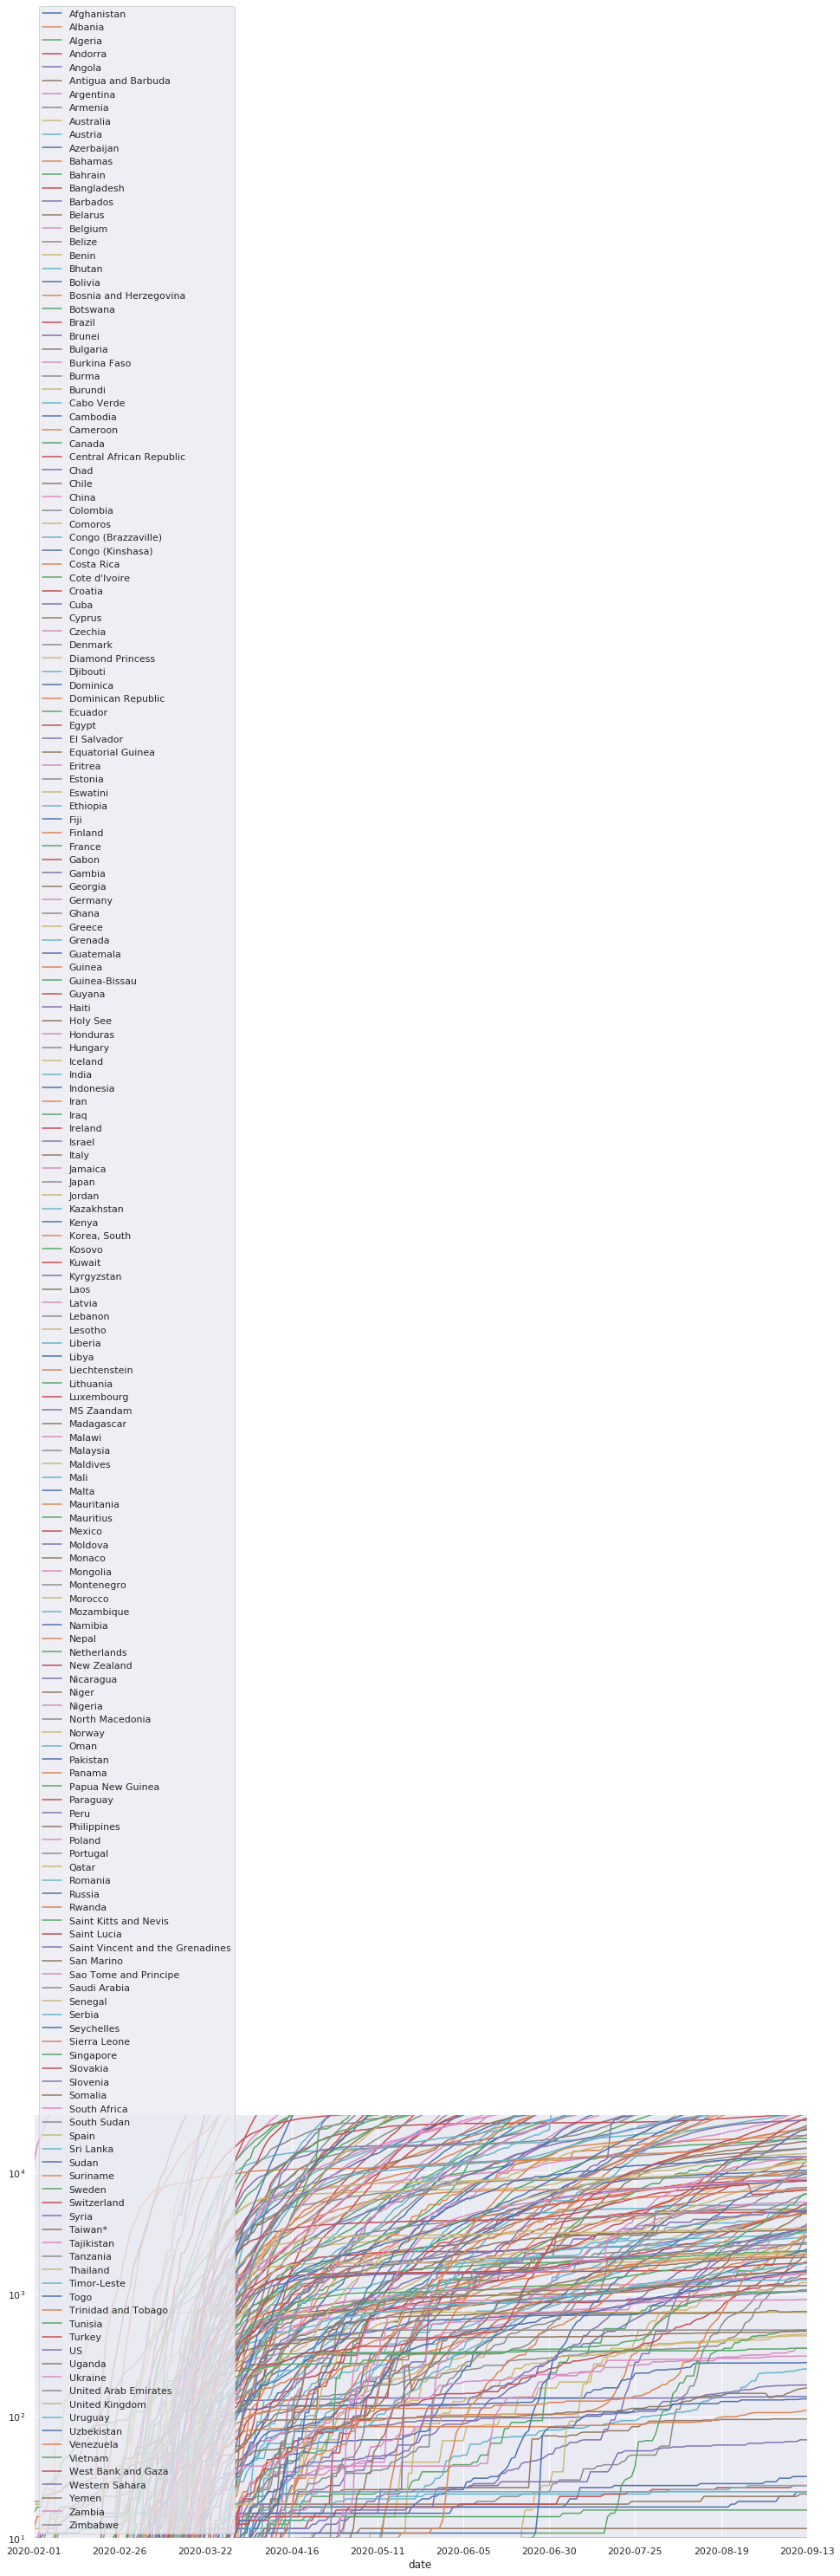

In [17]:
plt.figure();
ax=df_plot.iloc[10:,:].set_index('date').plot()
plt.ylim(10, 30000)
ax.set_yscale('log')

PLOTLY

In [5]:
import plotly.graph_objects as go

In [18]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
country_list = []
for col in pd_raw.columns:
        val = list(pd_raw['Country/Region'])
        for v in val:
            country_list.append(v)
country_list = list(dict.fromkeys(country_list))
country_list = country_list[:5]
country_list



['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [19]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1600,
    height=1200,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='firefox')
#fig.show()

In [20]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

application = dash.Dash()
application.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])






In [29]:
from dash.dependencies import Input, Output

@application.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [30]:
application.run_server(debug = True,use_reloader= False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 98] Address already in use